In [39]:
import pandas as pd
import numpy as np
import math

In [40]:
df = pd.read_csv("test_data/Grounded CPW Leaky Wave antenna/S11 Data.csv")
X = df.drop(columns=['dB(S(1,1)) []'])

In [41]:
X.columns

Index(['Feed_Gap [mm]', 'Feed_Inset [cm]', 'Feed_W [cm]', 'Ground_gap [mm]',
       'Pad_L [cm]', 'Pad_W [cm]', 'Freq [GHz]'],
      dtype='object')

In [42]:
for col in X.columns:
    print(f"{col}: Range: {X[col].min()} - {X[col].max()}, avg: {X[col].mean()}")

Feed_Gap [mm]: Range: 0.2 - 0.5, avg: 0.4714285714285715
Feed_Inset [cm]: Range: 0.2 - 0.6, avg: 0.22857142857142856
Feed_W [cm]: Range: 0.8 - 1.2, avg: 1.1714285714285713
Ground_gap [mm]: Range: 3 - 4, avg: 3.3333333333333335
Pad_L [cm]: Range: 0.7 - 0.75, avg: 0.7142857142857144
Pad_W [cm]: Range: 0.9 - 1.2, avg: 1.0476190476190477
Freq [GHz]: Range: 2.0 - 20.0, avg: 11.0


<Axes: >

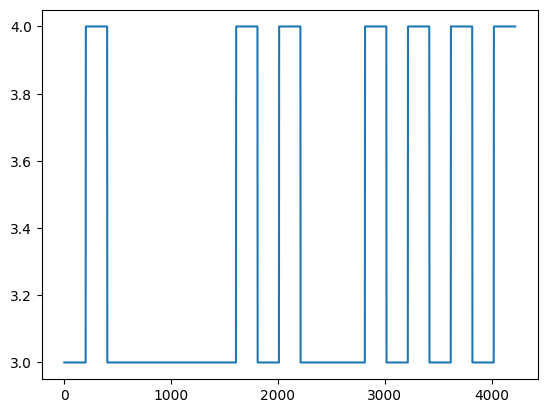

In [43]:
X['Ground_gap [mm]'].plot()

<Axes: >

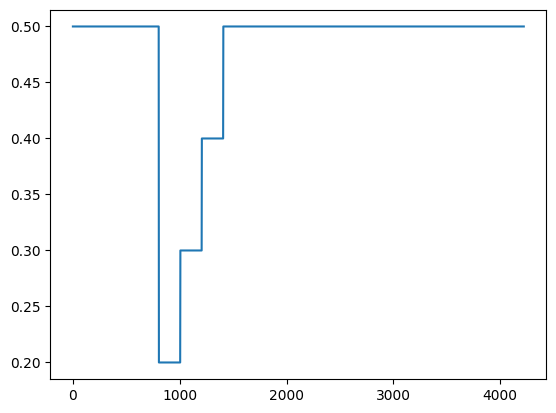

In [44]:
X['Feed_Gap [mm]'].plot()

In [45]:
X['Feed_Gap [mm]'].iloc[950]

0.2

In [46]:
complete_df = pd.DataFrame(columns=X.columns)

In [47]:
# Create all combinations of ranges 
ranges = {}
for column in X.columns:
    print()
    if X[column].dtype == "float64":
        step=0.05
        ranges[column] = np.arange(X[column].min(), X[column].max()+step, step)
    elif X[column].dtype == "int64":
        ranges[column] = list(range(X[column].min(), X[column].max()+1))

In [48]:
test = 0
for col in ranges:
    print(len(ranges[col]))

7
9
9
2
3
7
361


In [49]:
# # Combine of all ranges in one dataframe: https://stackoverflow.com/a/25636395
# ranges_dfs = pd.core.reshape.util.cartesian_product(ranges)
# ranges_dfs = list(map(list, zip(*ranges_dfs)))
# # print(ranges_dfs)
# ranges_dfs = pd.DataFrame(ranges_dfs, columns=X.columns)

In [50]:
from tqdm import tqdm

In [51]:
# Try cartesian product in pandas instead https://stackoverflow.com/a/13270110/3675086
ranges_df = pd.DataFrame(ranges[X.columns[0]], columns=[X.columns[0]])
for col in tqdm(complete_df.columns[1:]):
    temp_df = pd.DataFrame(ranges[col], columns=[col])
    # print(temp_df)
    ranges_df = ranges_df.merge(temp_df, how='cross')

100%|██████████| 6/6 [00:00<00:00,  8.26it/s]


In [57]:
ranges_df

,Feed_Gap [mm],Feed_Inset [cm],Feed_W [cm],Ground_gap [mm],Pad_L [cm],Pad_W [cm],Freq [GHz]
0,0.2,0.2,0.8,3,0.7,0.9,2.00
1,0.2,0.2,0.8,3,0.7,0.9,2.05
2,0.2,0.2,0.8,3,0.7,0.9,2.10
3,0.2,0.2,0.8,3,0.7,0.9,2.15
4,0.2,0.2,0.8,3,0.7,0.9,2.20
...,...,...,...,...,...,...,...
8596849,0.5,0.6,1.2,4,0.8,1.2,19.80
8596850,0.5,0.6,1.2,4,0.8,1.2,19.85
8596851,0.5,0.6,1.2,4,0.8,1.2,19.90
8596852,0.5,0.6,1.2,4,0.8,1.2,19.95


In [52]:
# Remove duplicates that are already calculated https://stackoverflow.com/a/44706892/3675086
#TODO this isn't working, fix the data types not matching up 
pd.merge(ranges_df,X, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

,Feed_Gap [mm],Feed_Inset [cm],Feed_W [cm],Ground_gap [mm],Pad_L [cm],Pad_W [cm],Freq [GHz]
0,0.2,0.2,0.8,3,0.7,0.9,2.00
1,0.2,0.2,0.8,3,0.7,0.9,2.05
2,0.2,0.2,0.8,3,0.7,0.9,2.10
3,0.2,0.2,0.8,3,0.7,0.9,2.15
4,0.2,0.2,0.8,3,0.7,0.9,2.20
...,...,...,...,...,...,...,...
8596849,0.5,0.6,1.2,4,0.8,1.2,19.80
8596850,0.5,0.6,1.2,4,0.8,1.2,19.85
8596851,0.5,0.6,1.2,4,0.8,1.2,19.90
8596852,0.5,0.6,1.2,4,0.8,1.2,19.95


In [58]:
ranges_df.dtypes

Feed_Gap [mm]      float64
Feed_Inset [cm]    float64
Feed_W [cm]        float64
Ground_gap [mm]      int64
Pad_L [cm]         float64
Pad_W [cm]         float64
Freq [GHz]         float64
dtype: object

In [59]:
X.dtypes

Feed_Gap [mm]      float64
Feed_Inset [cm]    float64
Feed_W [cm]        float64
Ground_gap [mm]      int64
Pad_L [cm]         float64
Pad_W [cm]         float64
Freq [GHz]         float64
dtype: object

In [55]:
# Run thru ML model to get predictions

In [56]:
# Combine original df with predictions df